In [1]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

from gradvi.tests import toy_priors
from gradvi.tests import toy_data
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma
from gradvi.inference import Trendfiltering
from mrashpen.utils import R_trendfilter

def saveplot(fig, fileprefix, ext = 'png', plotdir = 'plots'):
    filename = f"{plotdir}/{fileprefix}.{ext}"
    fig.savefig(filename, bbox_inches = 'tight')
    return

plotprefix = 'doppler'

In [5]:
import special_data
n = 4096
data = special_data.doppler(n)

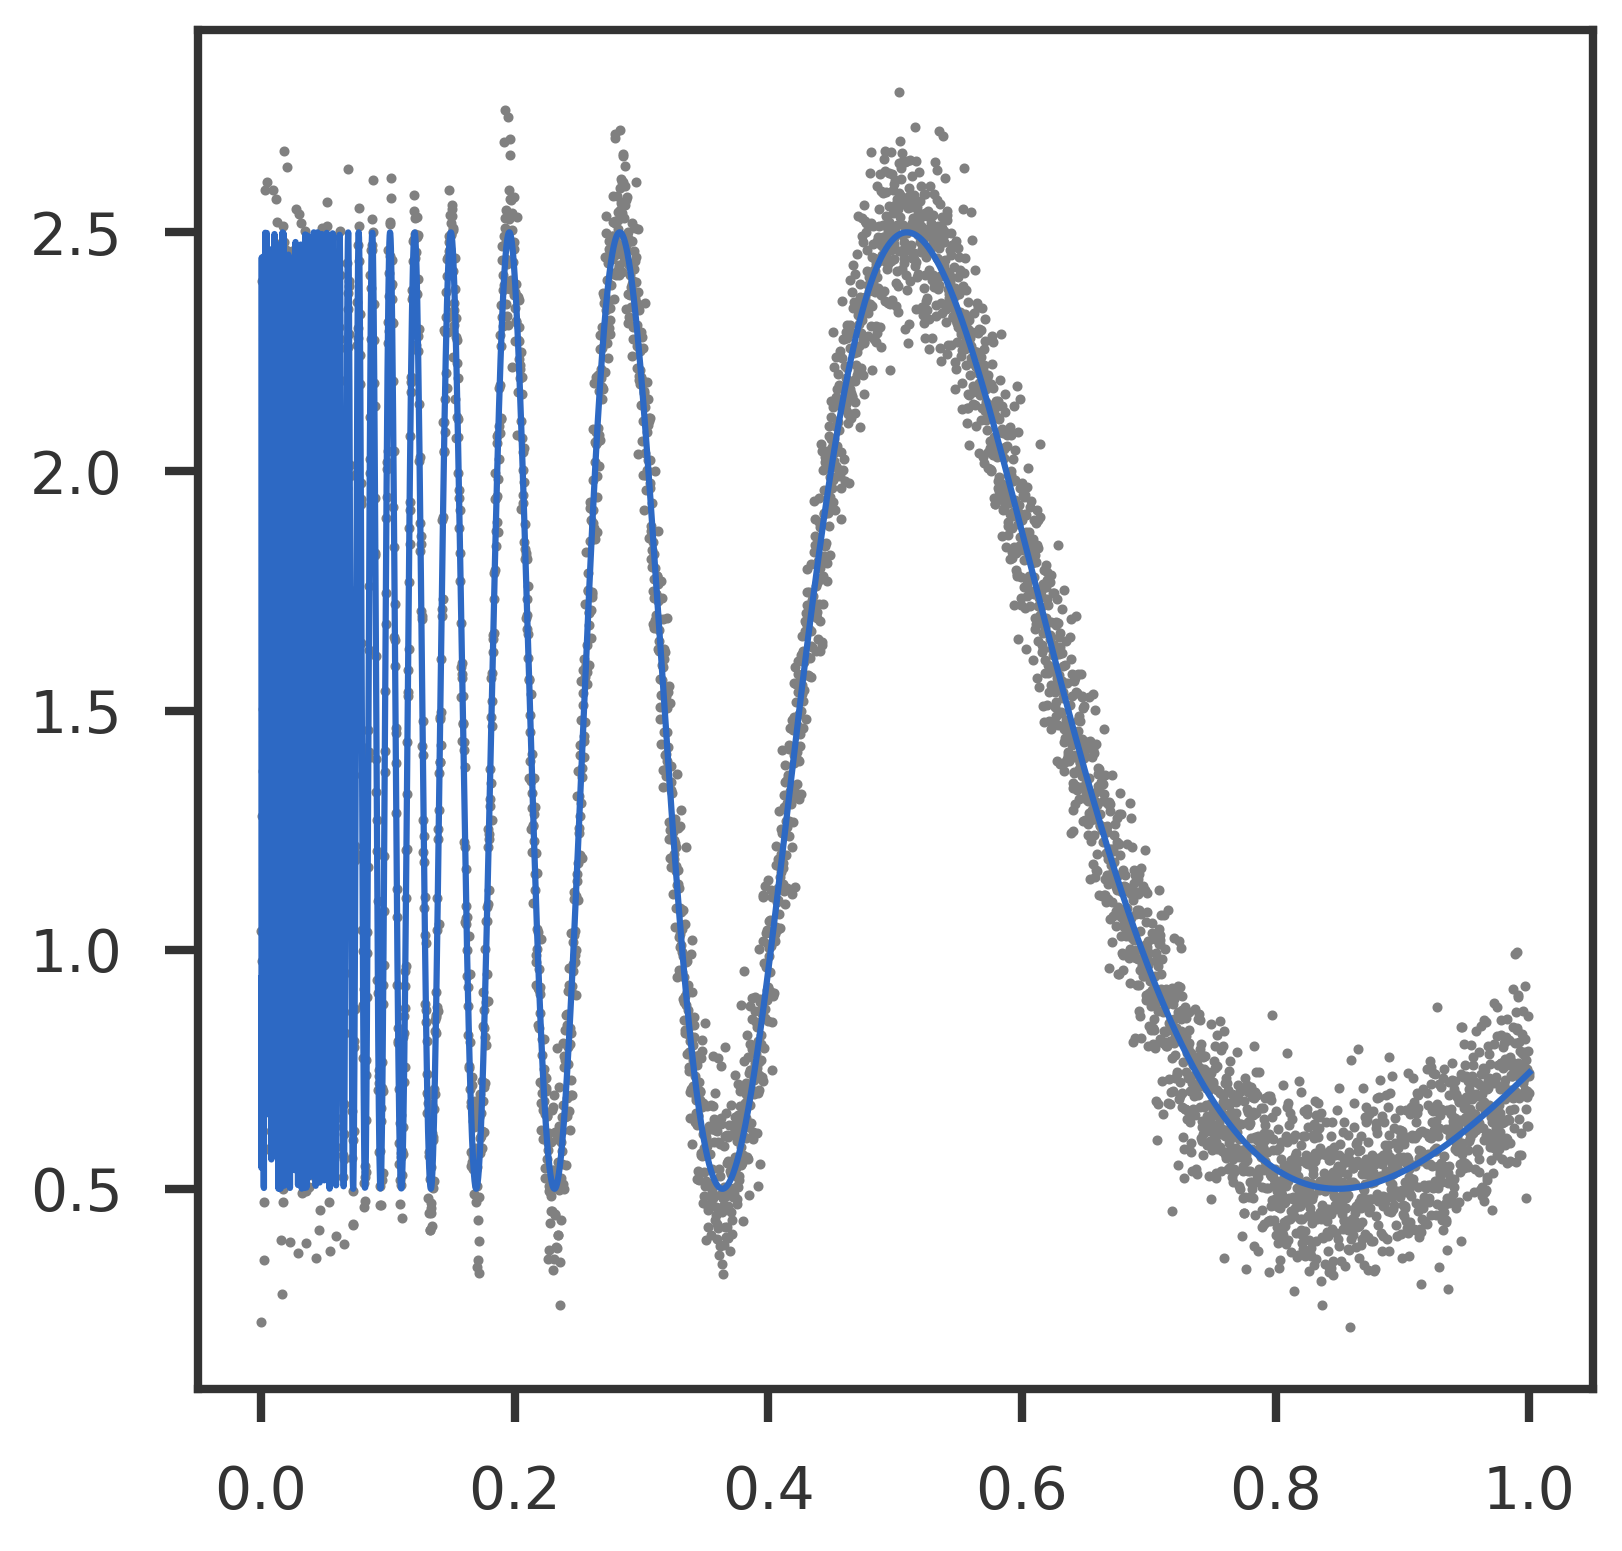

In [6]:
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
ax.scatter(data.x, data.y, s = 2, color = 'gray')
ax.plot(data.x, data.ytrue)
plt.show()

In [7]:
tf_y, tf_fit = R_trendfilter.fit(data.y, order = 2)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 



R[write to console]: Loading required package: Matrix



In [9]:
prior_init = toy_priors.get_ash_scaled(k = 20, sparsity = None, skbase = (2 + 1) * 2.)
gv = Trendfiltering(maxiter = 10000, scale_tfbasis = False)
#gv[dk].fit(dt.y, dk, gv_init.prior, y_init = gv_init.ypred, s2_init = s2_init)
gv.fit(data.y, 2, prior_init, y_init = tf_y)

NameError: name 'dk' is not defined

In [10]:
print (f"Run {gv.niter} iterations.")

Run 2871 iterations.


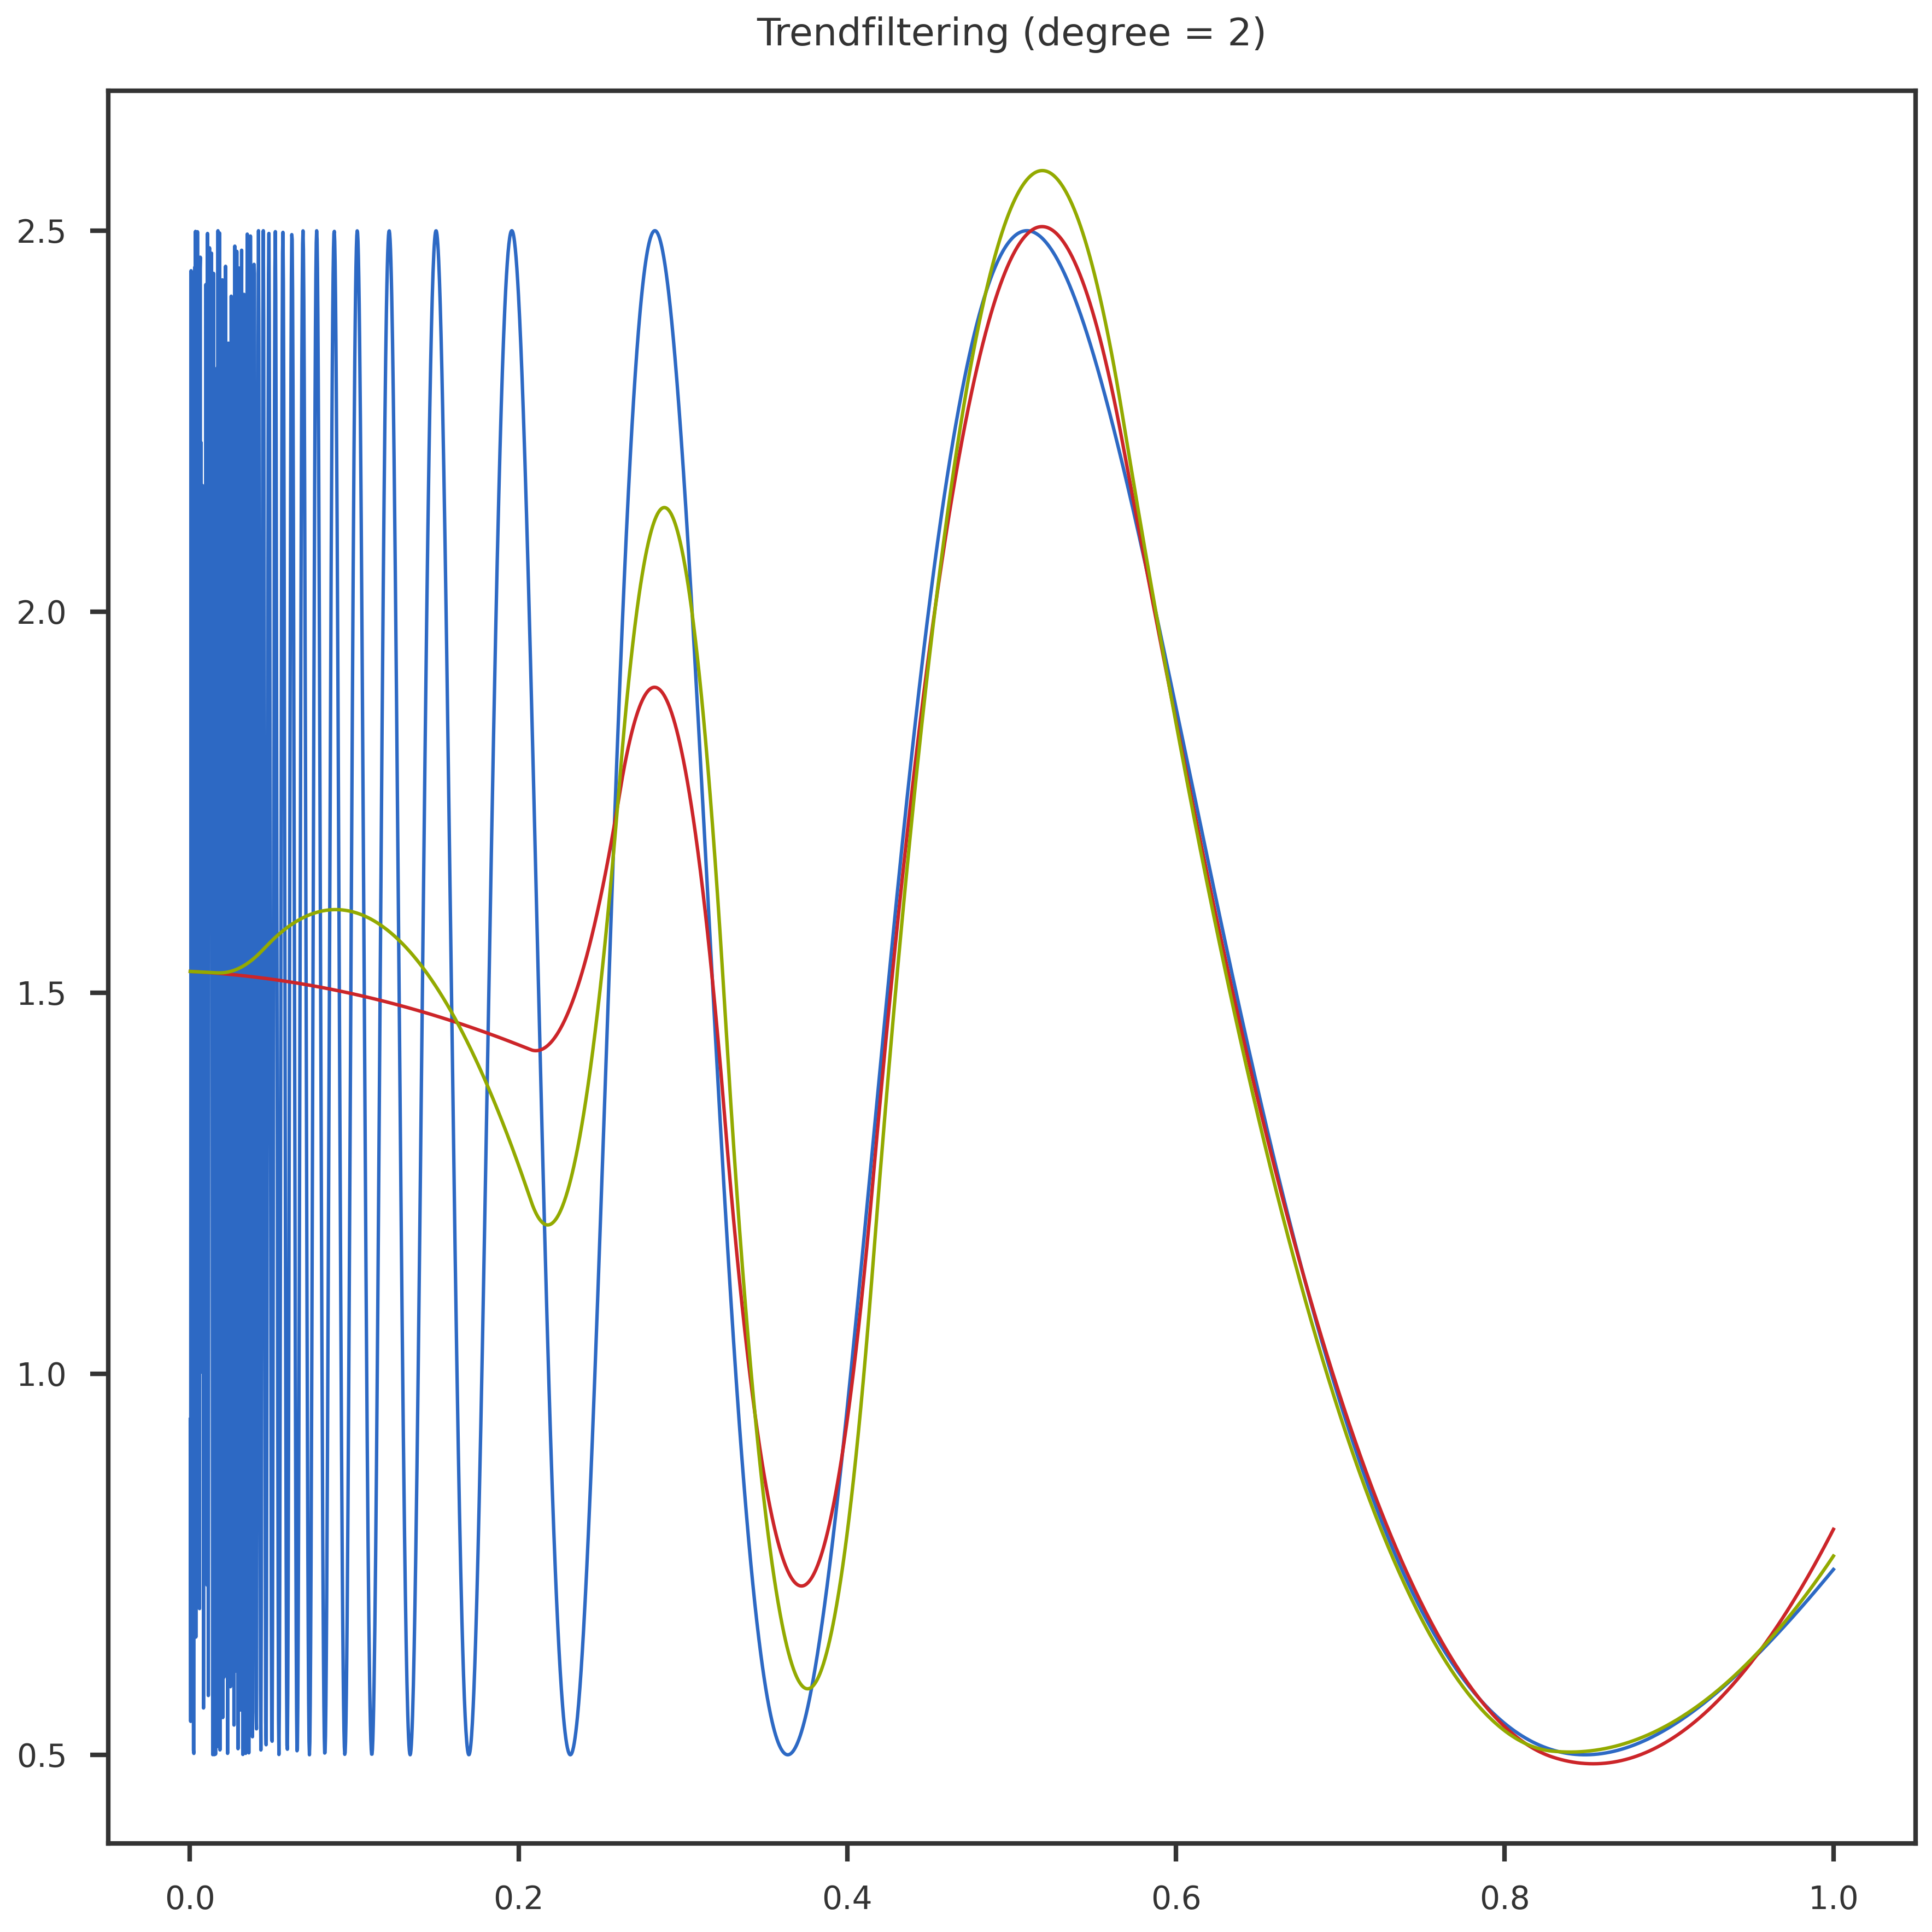

In [12]:
fig = plt.figure(figsize = (12, 12))
ax  = fig.add_subplot(1,1,1)
ax.plot(data.x, data.ytrue, label = 'True')
ax.plot(data.x, tf_y, label = 'Genlasso')
ax.plot(data.x, gv.ypred, label = 'GradVI')
ax.set_title(f"Trendfiltering (degree = 2)", pad = 20)
    
fig.tight_layout()
#fig.subplots_adjust(wspace=0.25)
# utils.saveplot(fig, 'trendfiltering_simple_examples')
plt.show()